# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

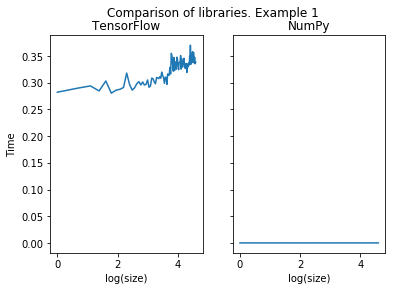

In [12]:
import time

sess = tf.Session()

time_tf = []
time_np = []
f = 100

for n in range(1,f):
    np_arr_tf = tf.random.normal(shape = (n,n))
    np_arr_np = np.random.normal(size = [n,n])
    
    y = tf.reduce_sum(tf.diag_part(np_arr_tf) ** 2)

    begin_tf = time.time()
    sess.run(y)
    end_tf = time.time()
    time_spent_tf = end_tf - begin_tf
    
    time_tf.append(time_spent_tf)
    
    begin_np = time.time()
    np.sum(np.diagonal(np_arr_np) ** 2)
    end_np = time.time()
    time_spent_np = end_np - begin_np
    
    time_np.append(time_spent_np)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Comparison of libraries. Example 1')
ax1.set_title('TensorFlow')
ax2.set_title('NumPy')
ax1.set_ylabel('Time')
ax1.set_xlabel('log(size)')
ax2.set_xlabel('log(size)')
ax1.plot(np.log(range(1,f)), time_tf)
ax2.plot(np.log(range(1,f)), time_np)


sess.close()

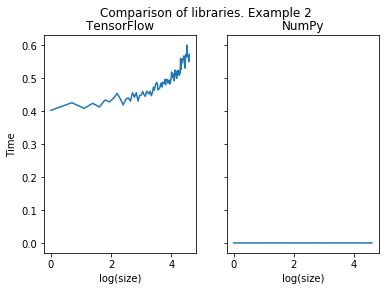

In [14]:
import time

sess = tf.Session()

time_tf = []
time_np = []
f = 100

for n in range(1,f):
    a = tf.random.normal(shape = (n,))
    b = tf.random.normal(shape = (n,))

    y = tf.acos(tf.tensordot(a, b, 1)/(tf.linalg.norm(a) * tf.linalg.norm(b)))
    
    a_np = np.random.normal(size = [n,])
    b_np = np.random.normal(size = [n,])


    begin_tf = time.time()
    sess.run(y)
    end_tf = time.time()
    time_spent_tf = end_tf - begin_tf
    
    time_tf.append(time_spent_tf)
    
    begin_np = time.time()
    np.arccos(np.dot(a_np, b_np)/(np.linalg.norm(a_np) * np.linalg.norm(b_np)))
    end_np = time.time()
    time_spent_np = end_np - begin_np
    
    time_np.append(time_spent_np)

    
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Comparison of libraries. Example 2')
ax1.set_title('TensorFlow')
ax2.set_title('NumPy')
ax1.set_ylabel('Time')
ax1.set_xlabel('log(size)')
ax2.set_xlabel('log(size)')
ax1.plot(np.log(range(1,f)), time_tf)
ax2.plot(np.log(range(1,f)), time_np)


sess.close()

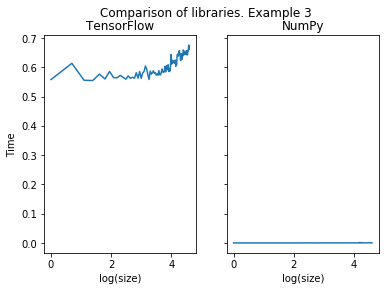

In [15]:
import time

sess = tf.Session()

time_tf = []
time_np = []
f = 100

for n in range(1,f):
    a = tf.random.normal(shape = (n,n))
    b = tf.random.normal(shape = (n,n))

    y = tf.reduce_sum(tf.matmul(a, b) - tf.matmul(b, a))
    
    a_np = np.random.uniform(size = [n,n])
    b_np = np.random.uniform(size = [n,n])


    begin_tf = time.time()
    sess.run(y)
    end_tf = time.time()
    time_spent_tf = end_tf - begin_tf
    
    time_tf.append(time_spent_tf)
    
    begin_np = time.time()
    np.sum(np.dot(a_np, b_np) - np.dot(b_np, a_np))
    end_np = time.time()
    time_spent_np = end_np - begin_np
    
    time_np.append(time_spent_np)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Comparison of libraries. Example 3')
ax1.set_title('TensorFlow')
ax2.set_title('NumPy')
ax1.set_ylabel('Time')
ax1.set_xlabel('log(size)')
ax2.set_xlabel('log(size)')
ax1.plot(np.log(range(1,f)), time_tf)
ax2.plot(np.log(range(1,f)), time_np)


sess.close()

**Numpy оказывается быстрее, чем Tensorflow.**

Возможным объяснением, может является то, что для Tensorflow мы передаем уже созданные матрицы и вектора и поэтому для него занимает время перевести это на GPU для осуществления операции. Таким образом, _если бы данный код прогонялся напрямую на GPU_ мы могли бы сократить намного время для Tensorflow. Однако, в существующих условиях, мы видим, что **NumPy значительно выигрывает по времени у Tensorflow**

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [17]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

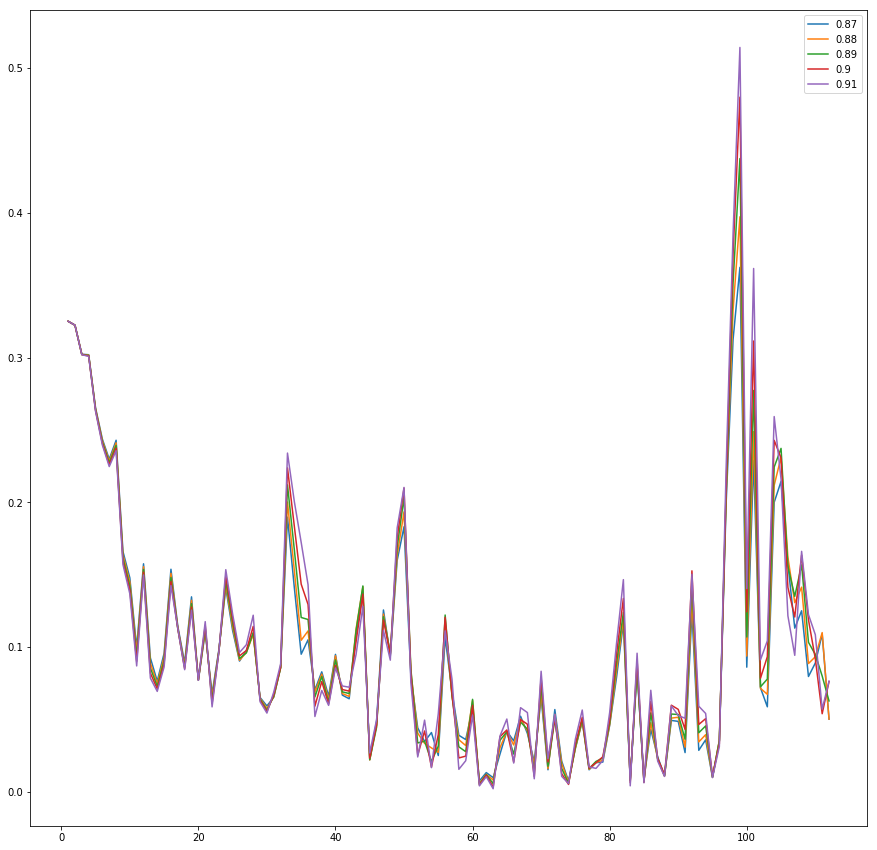

In [20]:
plt.figure(figsize=(15,15))

for i in range(87, 92):
  l = train(X, y,  tf.train.MomentumOptimizer(learning_rate = 0.01, momentum=i/100).minimize(loss))
  plt.plot(range(1, len(l)+1), l, label=i/100)
  
plt.legend()

Мы видим, что наилучший результат достигается при 0.88

Ваш ответ: 0.88

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

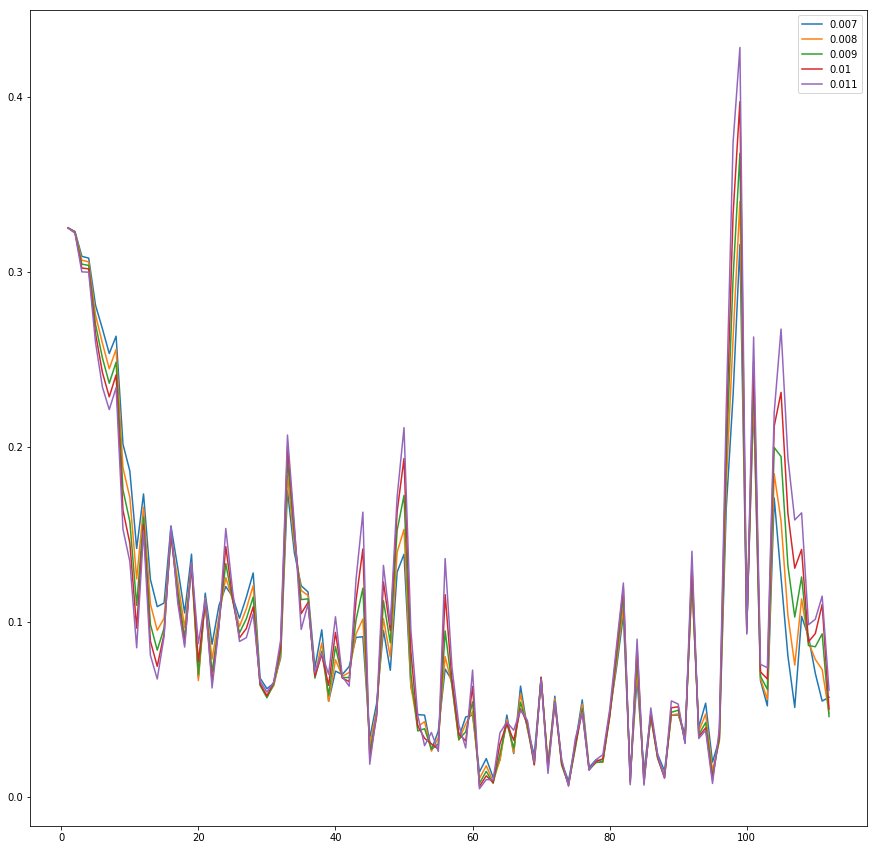

In [21]:
plt.figure(figsize=(15,15))

for i in range(7, 12, 1):
  l = train(X, y,  tf.train.MomentumOptimizer(learning_rate = i/1000, momentum=0.88).minimize(loss))
  plt.plot(range(1, len(l)+1), l, label=i/1000)
  
plt.legend()

Мы видим, что зеленый график в итоге оказался ниже остальных, таким образом, нам стоит выбрать 0.009

Ваш ответ: 0.009

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

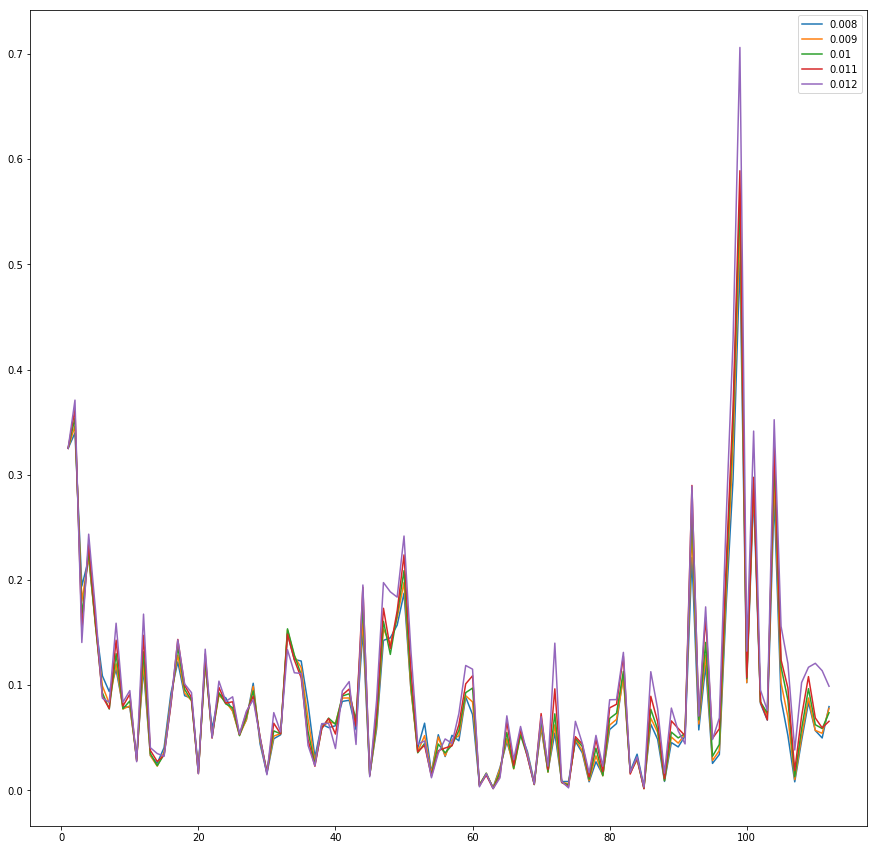

In [26]:
plt.figure(figsize=(15,15))

for i in range(8, 13, 1):
  l = train(X, y,  tf.train.AdamOptimizer(learning_rate = i/1000).minimize(loss))
  plt.plot(range(1, len(l)+1), l, label=i/1000)
  
plt.legend()

Мы видим, что красная линия, оказалась ниже остальных, поэтому нам стоит предпочтесть 0.011

Ваш ответ: 0.011

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

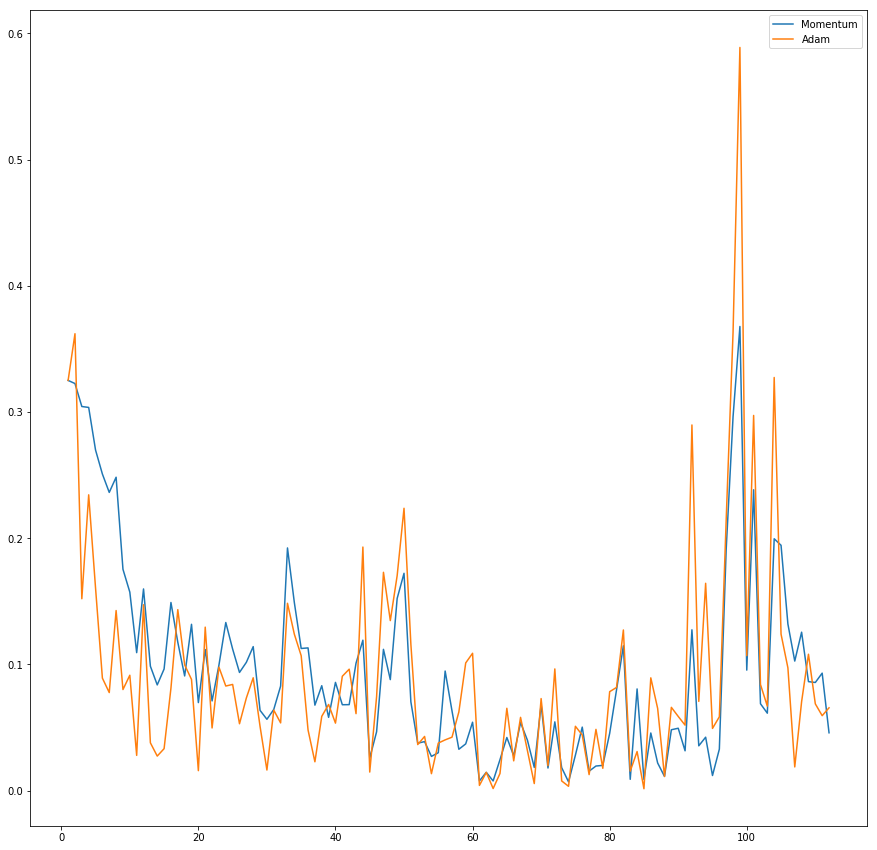

In [27]:
plt.figure(figsize=(15,15))

l1 = train(X, y,  tf.train.MomentumOptimizer(learning_rate = 0.009, momentum=0.88).minimize(loss))
l2 = train(X, y,  tf.train.AdamOptimizer(learning_rate = 0.011).minimize(loss))


plt.plot(range(1, len(l1)+1), l1, label='Momentum')
plt.plot(range(1, len(l2)+1), l2, label='Adam')

plt.legend()

Мы видим, что оба оптимизатора довольно близки друг к другу, однако, Momentum в конце оказывается лучше, поэтому нам стоит предпочесть его.

Ваш ответ: Momentum

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [28]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

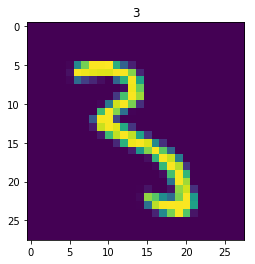

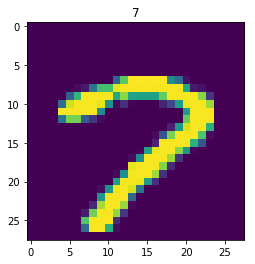

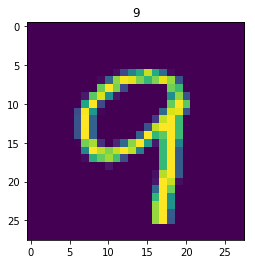

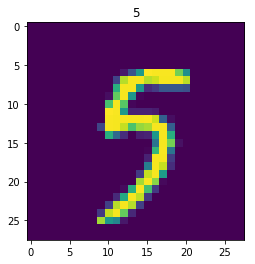

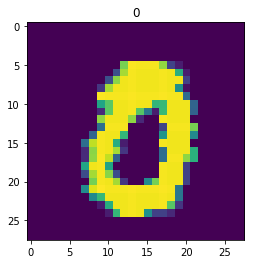

In [29]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [39]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(5):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

layer1 = tf.layers.dense(X_input, 128, activation=tf.nn.relu)

logits = tf.layers.dense(layer1, n_labels)
predicted = tf.nn.softmax(logits)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels = tf.one_hot(y_input, depth=n_labels))
train_op =  tf.train.AdamOptimizer().minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op) 

Test accuracy:  0.9753
Test accuracy:  0.9753
Test accuracy:  0.9753
Test accuracy:  0.9753
Test accuracy:  0.9753


Одной эпохи, то есть одного прохода вперед и назад по алгоритму может быть недостаточно и мы можем столкнуться с проблемой недообученности, но с другой стороны выставляя большие количества эпох мы можем сталкнуться с обратной проблемой переобучения, поскольку мы все больше раз передаем наши данные на обучение нейросети, далее чаще меняются веса модели и она стремится переобучиться на имеющихся у нас данных. Таким образом, необходимо подобрать подходящее количество эпох, которое я установил равным 5 исходя из достижения необходимой точности модели. 

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 